In [3]:
###Guy Dor
###DSC 540
###Final Project Code


import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'/resources/DSC 540'

In [4]:
import pandas as pd
import numpy as np
file1= pd.read_csv('bank-additional-full.csv', delimiter=';', quotechar='"')
file1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
file1.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [14]:
#moving target to front and removing duration, as documentation dictates that it is too closely correlated to the target and unrealistic.

file1=file1[['y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
file1=file1.drop(['duration'],axis=1)
file1.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,no,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,no,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,no,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,no,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,no,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


/home/jupyterlab/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


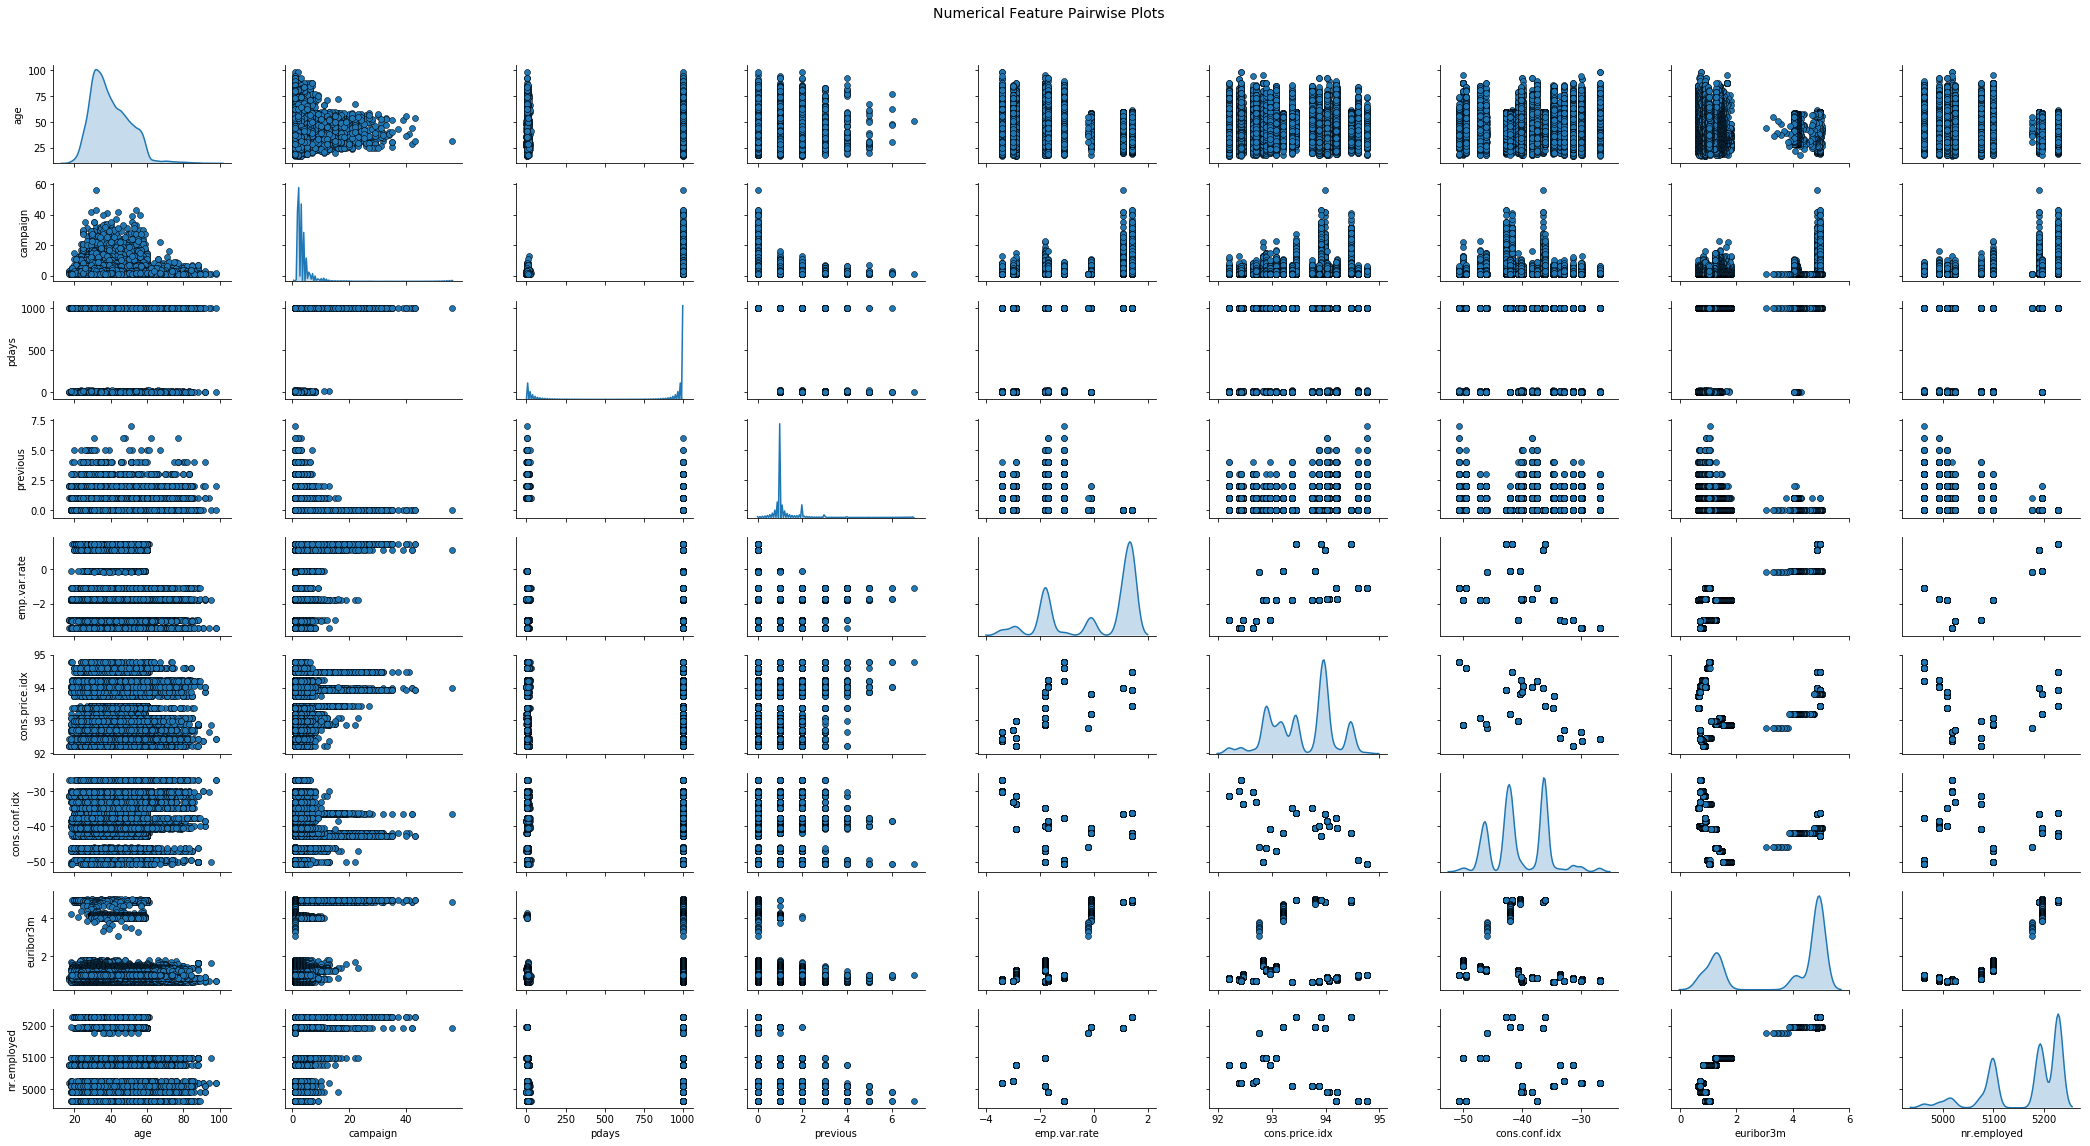

In [12]:
import seaborn as sns
pp = sns.pairplot(file1, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Numerical Feature Pairwise Plots', fontsize=20)
plt.show()

In [223]:
#file1=pd.get_dummies(file1, prefix=['marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], 
#                     columns=['marital', 'default', 'housing', 'loan', 'contact', 'poutcome'])
#file1.head()

,y,age,job,education,month,day_of_week,campaign,pdays,previous,emp.var.rate,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,56,housemaid,basic.4y,may,mon,1,999,0,1.1,...,0,0,1,0,0,0,1,0,1,0
1,no,57,services,high.school,may,mon,1,999,0,1.1,...,0,0,1,0,0,0,1,0,1,0
2,no,37,services,high.school,may,mon,1,999,0,1.1,...,0,1,1,0,0,0,1,0,1,0
3,no,40,admin.,basic.6y,may,mon,1,999,0,1.1,...,0,0,1,0,0,0,1,0,1,0
4,no,56,services,high.school,may,mon,1,999,0,1.1,...,0,0,0,0,1,0,1,0,1,0


In [15]:
binary_switch = {"no": 2, "yes": 1}
tertiary_switch = {"no": 2, "yes": 1, "unknown":3}
job_switch = {"admin.":0, "blue-collar":1, "entrepreneur":2, "housemaid":3, "management":4, "retired":5, "self-employed":6, "services":7 , "student":8, "technician":9 , "unemployed":10, "unknown":11}
marital_switch = {"married":0,"divorced":1,"single":2, "unknown":4}
education_switch = {"basic.4y":0 ,"basic.6y":1, "basic.9y":2, "high.school":3 ,"illiterate":4, "professional.course":5, "university.degree":6 ,"unknown":7}
contact_switch = {"unknown":0,"telephone":1,"cellular":2}
month_switch = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
poutcome_switch = {"nonexistent":0,"failure":1,"success":2}
day_of_week_switch = {"mon":0, "tue":1, "wed":2, "thu":3, "fri":4, "sat":5, "sun":6}

file1.y = [binary_switch[item] for item in file1.y] 
file1.loan = [tertiary_switch[item] for item in file1.loan] 
file1.housing = [tertiary_switch[item] for item in file1.housing]
file1.default = [tertiary_switch[item] for item in file1.default]


file1.job = [job_switch[item] for item in file1.job]
file1.marital = [marital_switch[item] for item in file1.marital]
file1.education = [education_switch[item] for item in file1.education]
file1.contact = [contact_switch[item] for item in file1.contact]
file1.month = [month_switch[item] for item in file1.month]
file1.day_of_week = [day_of_week_switch[item] for item in file1.day_of_week]
file1.poutcome = [poutcome_switch[item] for item in file1.poutcome]

file1.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2,56,3,0,0,2,2,2,1,5,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
1,2,57,7,0,3,3,2,2,1,5,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
2,2,37,7,0,3,2,1,2,1,5,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
3,2,40,0,0,1,2,2,2,1,5,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0
4,2,56,7,0,3,2,2,1,1,5,0,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0


In [16]:
file1.describe(include='all')

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,1.887346,40.02406,3.72458,0.681461,3.747184,2.208653,1.500194,1.872341,1.634748,6.607896,1.979581,2.567593,962.475454,0.172963,0.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,0.316173,10.42125,3.59456,0.895609,2.136482,0.406530,0.545967,0.399297,0.481507,2.040998,1.411514,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.000000,17.00000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,2.000000,32.00000,0.00000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,5.000000,1.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,2.000000,38.00000,2.00000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000,6.000000,2.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,2.000000,47.00000,7.00000,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,8.000000,3.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,2.000000,98.00000,11.00000,4.000000,7.000000,3.000000,3.000000,3.000000,2.000000,12.000000,4.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
file1.to_csv("bank_additional_cleaned.csv",index=False)

Modeling Process


In [5]:
#############################################################################
#
# Import Packages
#
#####################
import sys
import csv
import math
import numpy as np
from operator import itemgetter
import time
import copy

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, IsolationForest, RandomTreesEmbedding, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.externals import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, log_loss
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, scale
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.combine import SMOTEENN

#Handle annoying warnings
import warnings, sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)


In [6]:
#############################################################################
#
# Global parameters
#
#####################

target_idx=0                                        #Index of Target variable
cross_val=1                                         #Control Switch for CV
norm_target=0                                       #Normalize target switch
norm_features=0                                     #Normalize features switch
binning=1                                           #Control Switch for Bin Target
bin_cnt=2                                           #If bin target, this sets number of classes
feat_select=1                                       #Control Switch for Feature Selection
fs_type=2                                           #Feature Selection type (1=Stepwise Backwards Removal, 2=Wrapper Select, 3=Univariate Selection, 4=Full-Blown Wrapper)
lv_filter=0                                         #Control switch for low variance filter on features
feat_start=1                                        #Start column of features
k_cnt=10                                            #Number of 'Top k' best ranked features to select, only applies for fs_types 1 and 3
gridsearch=1                                        #Enabling of Cross Validated GridSearch
resampling=1                                        #Resampling Switch
resampling_type=2                                   #Resampling using (1=SMOTE, 2=ADASYN, 3=RandomUnderSampler, 4=NearMiss, 5=ClusterCentroids, 51=ClusterCentroids+SMOTE)

#Set global model parameters
rand_st=1                                           #Set Random State variable for randomizing splits on runs

In [7]:
#############################################################################
#
# Wrapper Feat Select Helper
#
##########################################

#Recursive Function for searching thru feature space
def feat_space_search(arr, curr_idx):
    '''Setup currently as exhuastive search, but could be changed to use
       greedy search, random search, genetic algorithms, etc. ... also
       no regularization, so probably selects more features than necessary'''
    global roll_idx, combo_ctr, best_score, sel_idx
    
    if curr_idx==feat_cnt:
        #If end of feature array, roll thru combinations
        roll_idx=roll_idx+1
        print ("Combos Searched so far:", combo_ctr, "Current Best Score:", best_score)
        for i in range(roll_idx, len(arr)):
            arr[i]=0
        if roll_idx<feat_cnt-1:
            feat_space_search(arr, roll_idx+1)                                                                      #Recurse till end of rolls
        
    else:
        #Else setup next feature combination and calc performance
        arr[curr_idx]=1
        data=data_np#_wrap                                                                                          #Temp array to hold data
        temp_del=[i for i in range(len(arr)) if arr[i]==0]                                                          #Pick out features not in this combo, and remove
        data = np.delete(data, temp_del, axis=1)
        data_train, data_test, target_train, target_test = train_test_split(data, target_np, test_size=0.35)                

        if binning==1:
            if bin_cnt<=2:
                scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
                scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5) 
                score = scores['test_roc_auc'].mean()                                                               #AUC
            else:
                sscorers = {'Accuracy': 'accuracy'}
                scores = cross_validate(clf, data_np, target_np, scoring=scorers, cv=5) 
                score = scores['test_Accuracy'].mean()                                                              #Accuracy
            #print('Random Forest Acc/AUC:', curr_idx, feat_arr, len(data[0]), score)
            if score>best_score:                                                                                    #Compare performance and update sel_idx and best_score, if needed
                best_score=score
                sel_idx=copy.deepcopy(arr) 
                
        if binning==0:
            scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'}
            scores = cross_validate(rgr, data, target_np, scoring=scorers, cv=5)    
            score = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']]).mean()                              #RMSE
            #print('Random Forest RMSE:', curr_idx, feat_arr, len(data[0]), score)
            if score<best_score:                                                                                    #Compare performance and update sel_idx and best_score, if needed
                best_score=score
                sel_idx=copy.deepcopy(arr) 

        #move to next feature index and recurse
        combo_ctr+=1  
        curr_idx+=1
        feat_space_search(arr, curr_idx)                                                                            #Recurse till end of iteration for roll
        

In [11]:
#############################################################################
#
# Load Data
#
#####################

file1= csv.reader(open('bank_additional_cleaned.csv'), delimiter=',')

#Read Header Line
header=next(file1)            

#Read data
data=[]
target=[]
for row in file1:
    #Load Target
    if row[target_idx]=='':                         #If target is blank, skip row                       
        continue
    else:
        target.append(float(row[target_idx]))       #If pre-binned class, change float to int

    #Load row into temp array, cast columns  
    temp=[]
                 
    for j in range(feat_start,len(header)):
        if row[j]=='':
            temp.append(float())
        else:
            temp.append(float(row[j]))

    #Load temp into Data array
    data.append(temp)
  
#Test Print
print(header)
print(len(target),len(data))
'''for i in range(10):
    print(target[i])
    print(data[i])'''
print('\n')

data_np=np.asarray(data)
target_np=np.asarray(target)




['y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
41188 41188




In [12]:
#############################################################################
#
# Preprocess data
#
##########################################
if resampling==1:
    if resampling_type==1:
        data_np, target_np = SMOTE().fit_resample(data_np, target_np)
    elif resampling_type==2:
        data_np, target_np = ADASYN().fit_resample(data_np, target_np)
    elif resampling_type==3:
        rus = RandomUnderSampler(random_state=rand_st)
        data_np, target_np = rus.fit_resample(data_np, target_np)
    elif resampling_type==4:
        nm1 = NearMiss(version=1)
        data_np, target_np = nm1.fit_resample(data_np, target_np)
    elif resampling_type==5:
        cc = ClusterCentroids(random_state=rand_st)
        data_np, target_np = cc.fit_resample(data_np, target_np)
    elif resampling_type==51:
        cc = ClusterCentroids(random_state=rand_st)
        data_np, target_np = cc.fit_resample(data_np, target_np)
        data_np, target_np = SMOTE().fit_resample(data_np, target_np)
    elif resampling_type==6:
        sme=SMOTEENN(sampling_strategy='not minority', random_state=rand_st)
        data_np, target_np = sme.fit_resample(data_np, target_np)
        

if norm_target==1:
    #Target normalization for continuous values
    target_np=scale(target_np)

if norm_features==1:
    #Feature normalization for continuous values
    data_np=scale(data_np)

if binning==1:
    #Discretize Target variable with KBinsDiscretizer
    enc = KBinsDiscretizer(n_bins=[bin_cnt], encode='ordinal', strategy='quantile')                         #Strategy here is important, quantile creating equal bins, but kmeans prob being more valid "clusters"
    target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

    #Get Bin min/max
    temp=[[] for x in range(bin_cnt+1)]
    for i in range(len(target_np)):
        for j in range(bin_cnt):
            if target_np_bin[i]==j:
                temp[j].append(target_np[i])

    for j in range(bin_cnt):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')

    #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)

Bin 0 : 1.0 1.0 35796
Bin 1 : 2.0 2.0 36548




In [13]:
#############################################################################
#
# Feature Selection
#
##########################################

#Low Variance Filter
if lv_filter==1:
    print('--LOW VARIANCE FILTER ON--', '\n')
    
    #LV Threshold
    sel = VarianceThreshold(threshold=0.5)                                      #Removes any feature with less than 20% variance
    fit_mod=sel.fit(data_np)
    fitted=sel.transform(data_np)
    sel_idx=fit_mod.get_support()

    #Get lists of selected and non-selected features (names and indexes)
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)

    print('Selected', temp)
    print('Features (total, selected):', len(data_np[0]), len(temp))
    print('\n')

    #Filter selected columns from original dataset
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index


#Feature Selection
if feat_select==1:
    '''Three steps:
       1) Run Feature Selection
       2) Get lists of selected and non-selected features
       3) Filter columns from original dataset
       '''
    
    print('--FEATURE SELECTION ON--', '\n')
    
    ##1) Run Feature Selection #######
    if fs_type==1:
        #Stepwise Recursive Backwards Feature removal
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=None)
            sel = RFE(clf, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=3, criterion='mse', random_state=None)
            sel = RFE(rgr, n_features_to_select=k_cnt, step=.1)
            print('Stepwise Recursive Backwards - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)
        print(sel.ranking_)
        sel_idx=fit_mod.get_support()      

    if fs_type==2:
        #Wrapper Select via model
        if binning==1:
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=None)
            sel = SelectFromModel(clf, prefit=False, threshold='mean', max_features=None)                                                           #to select only based on max_features, set to integer value and set threshold=-np.inf
            print ('Wrapper Select - Random Forest: ')
        if binning==0:
            rgr = RandomForestRegressor(n_estimators=200, max_features=.33, max_depth=None, min_samples_split=3, criterion='mse', random_state=None)
            sel = SelectFromModel(rgr, prefit=False, threshold='mean', max_features=None)
            print ('Wrapper Select - Random Forest: ')
            
        fit_mod=sel.fit(data_np, target_np)    
        sel_idx=fit_mod.get_support()

    if fs_type==3:       
        if binning==1:                                                              ######Only work if the Target is binned###########
            #Univariate Feature Selection - Chi-squared
            sel=SelectKBest(mutual_info_classif, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)                                         #will throw error if any negative values in features, so turn off feature normalization, or switch to mutual_info_classif
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        if binning==0:                                                              ######Only work if the Target is continuous###########
            #Univariate Feature Selection - Mutual Info Regression
            sel=SelectKBest(mutual_info_regression, k=k_cnt)
            fit_mod=sel.fit(data_np, target_np)
            print ('Univariate Feature Selection - Mutual Info: ')
            sel_idx=fit_mod.get_support()

        #Print ranked variables out sorted
        temp=[]
        scores=fit_mod.scores_
        for i in range(feat_start, len(header)):            
            temp.append([header[i], float(scores[i-feat_start])])

        print('Ranked Features')
        temp_sort=sorted(temp, key=itemgetter(1), reverse=True)
        for i in range(len(temp_sort)):
            print(i, temp_sort[i][0], ':', temp_sort[i][1])
        print('\n')
    
    if fs_type==4:
        #Full-blown Wrapper Select (from any kind of ML model)        
        if binning==1:                                                              ######Only work if the Target is binned###########
            start_ts=time.time()
            sel_idx=[]                                                                                      #Empty array to hold optimal selected feature set
            best_score=0                                                                                    #For classification compare Accuracy or AUC, higher is better, so start with 0
            feat_cnt=len(data_np[0])
            #Create Wrapper model
            clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=None)                                 #This could be any kind of classifier model
      
        if binning==0:                                                              ######Only work if the Target is continuous###########
            start_ts=time.time()
            sel_idx=[]                                                                                      #Empty array to hold optimal selected feature set
            best_score=sys.float_info.max                                                                   #For regression compare RMSE, lower is better, so start with max sys float value
            feat_cnt=len(data_np[0])
            #Create Wrapper model
            rgr = SVR(C=1.0, kernel='linear', gamma=0.1)                    #This could be any kind of regressor model         
        
        #Loop thru feature sets
        roll_idx=0
        combo_ctr=0
        feat_arr=[0 for col in range(feat_cnt)]                                         #Initialize feature array
        for idx in range(feat_cnt):
            roll_idx=idx
            feat_space_search(feat_arr, idx)                                           #Recurse
            feat_arr=[0 for col in range(feat_cnt)]                                     #Reset feature array after each iteration
        
        print('# of Feature Combos Tested:', combo_ctr)
        print(best_score, sel_idx, len(data_np[0]))
        print("Wrapper Feat Sel Runtime:", time.time()-start_ts)

    ##2) Get lists of selected and non-selected features (names and indexes) #######
    temp=[]
    temp_idx=[]
    temp_del=[]
    for i in range(len(data_np[0])):
        if sel_idx[i]==1:                                                           #Selected Features get added to temp header
            temp.append(header[i+feat_start])
            temp_idx.append(i)
        else:                                                                       #Indexes of non-selected features get added to delete array
            temp_del.append(i)
    print('Selected', temp)
    print('Features (total/selected):', len(data_np[0]), len(temp))
    print('\n')
            
                
    ##3) Filter selected columns from original dataset #########
    header = header[0:feat_start]
    for field in temp:
        header.append(field)
    data_np = np.delete(data_np, temp_del, axis=1)                                 #Deletes non-selected features by index)



--FEATURE SELECTION ON-- 

Wrapper Select - Random Forest: 
Selected ['age', 'education', 'default', 'housing', 'loan', 'day_of_week', 'campaign', 'euribor3m']
Features (total/selected): 19 8




In [ ]:
#############################################################################
#
# GridSearch for Random Forest
#
##########################################
'''
if gridsearch==1 and binning==1 and cross_val==1:
    print('--GRIDSEARCH ON--', '\n')
    scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
    

# Create the parameter grid based on the results of random search 
    param_grid = {'bootstrap': [False],
                  'criterion': ['entropy'],
                  'max_depth': [5, 50],
                  'max_features': [.01 ,.05 ],
                  'max_leaf_nodes': [5, 10, 50],
                  'min_samples_leaf': [1],
                  'min_samples_split': [2, 3],
                  'n_estimators': [1000, 5000]}
    
    # Create a based model
    rf = RandomForestClassifier(random_state = rand_st)
    # Instantiate the grid search model
    grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, scoring=scoring, refit='AUC', verbose=2, return_train_score=True)
    
    grid_search1.fit(data_np, target_np)
    
    best_params=grid_search1.best_params_
    print("Random Forest best parameters: ", best_params)
    best_grid = grid_search1.best_estimator_
    
    grid_accuracy = grid_search1.best_score_
    print("Random Forest Accuracy: %0.2f" % grid_accuracy)
    results = grid_search1.cv_results_
'''    

In [ ]:
#############################################################################
#
# GridSearch for Logistic Regression
#
##########################################
'''
if gridsearch==1 and binning==1 and cross_val==1:
    
    scoring = {'AUC': 'roc_auc_score', 'Accuracy': make_scorer(accuracy_score)}

# Create the parameter grid based on the results of random search 
    param_grid2 = {'penalty': ['l1', 'l2'],
                  'C': [0.01,0.1,1,10,100],
                  'fit_intercept': [True, False],
                  'class_weight': [None,'balanced'],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear']}
    
    # Create a based model
    lg = LogisticRegression(random_state = rand_st)
    # Instantiate the grid search model
    grid_search2 = GridSearchCV(estimator = lg, param_grid = param_grid2, 
                          cv = 3, n_jobs = -1,scoring=scoring, refit='AUC', verbose = 2, return_train_score=True)
    
    grid_search2.fit(data_np, target_np)
    
    best_param2s=grid_search2.best_params_
    print("Logistic Regression best parameters: ", best_params2)
    best_grid2 = grid_search2.best_estimator_
    
    grid_accuracy2 = grid_search2.best_score_
    print("Random Forest Accuracy: %0.2f" % grid_accuracy2)
    results2 = grid_search.cv_results_
'''    

In [13]:
#############################################################################
#
# Train SciKit Models
#
##########################################

print('--ML Model Output--', '\n')

#Test/Train split
#data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

####Classifiers####
#if binning==1 and cross_val==0:    
    #SciKit Decision Tree
#    lgr = LogisticRegression(penalty='l2', C=0.1, fit_intercept= True, class_weight='balanced', solver= 'lbfgs', random_state = rand_st)
#    clf.fit(data_train, target_train)
#    print('Logistic Regression Acc:', clf.score(data_test, target_test))
#    if bin_cnt<=2:                                                                                                  #AUC only works with binary classes, not multiclass
#        print('Logistic Regression AUC:', metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1]))             
    #joblib.dump(clf, 'DecTree_DSC540_HW1.pkl')                     #Save and pickle model

    #SciKit Random Forest
#    clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3, criterion='entropy', random_state=None)
#    clf.fit(data_train, target_train)
#    print('Random Forest Acc:', clf.score(data_test, target_test))
#    if bin_cnt<=2:                                                                                                  #AUC only works with binary classes, not multiclass
#        print('Random Forest AUC:', metrics.roc_auc_score(target_test, clf.predict_proba(data_test)[:,1]))             

model=[]
modelLogLoss=[]
modelAUC=[]
runtimes=[]
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    if bin_cnt<=2:
        scorers = {'Log Loss': make_scorer(log_loss), 'roc_auc': 'roc_auc'}
    else:
        scorers = {'Log Loss': make_scorer(log_loss)}

    
    lgr0 = LogisticRegression(solver= 'lbfgs', random_state = rand_st)
    lgr1 = LogisticRegression(penalty='l2', C=0.1, fit_intercept= True, solver= 'lbfgs', random_state = rand_st)
    lgr2 = LogisticRegression(penalty='l2', C=0.1, fit_intercept= True, solver= 'liblinear', random_state = rand_st)
    lgr3 = LogisticRegression(solver= 'lbfgs', C=.5, random_state = rand_st)
    
    sgd0 = SGDClassifier(alpha=0.0001, epsilon=0.1, max_iter=1000, tol=.0001, random_state=rand_st)
    sgd1 = SGDClassifier(alpha=0.0001, epsilon=0.1, max_iter=1000, tol=.0001, penalty='l1', random_state=rand_st)
    sgd2 = SGDClassifier(alpha=0.0001, epsilon=0.1, max_iter=1000, tol=.0001, penalty='elasticnet', random_state=rand_st)
    sgd3 = SGDClassifier(alpha=0.0001, epsilon=0.1, max_iter=1000, tol=.0001, penalty='none', random_state=rand_st)
    
    rf = RandomForestClassifier(n_estimators=10, random_state=rand_st)
    rf0 = RandomForestClassifier(n_estimators=100, random_state=rand_st)
    rf1 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=10, criterion='entropy', random_state=rand_st)
    rf2 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.3, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=10, criterion='gini', random_state=rand_st)
    rf3 = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features=0.3, max_leaf_nodes=200, min_samples_leaf=5, min_samples_split=10, criterion='entropy', random_state=rand_st)
    rf4 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    
    adb0 = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb1 = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb2 = AdaBoostClassifier(base_estimator=None, n_estimators=500, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb3 = AdaBoostClassifier(base_estimator=None, n_estimators=1000, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb4 = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.5, algorithm='SAMME.R', random_state=rand_st)
    
    bc0 = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, random_state=rand_st)
    bc1 = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, random_state=rand_st)
    bc2 = BaggingClassifier(base_estimator=None, n_estimators=500, max_samples=1.0, max_features=1.0, random_state=rand_st)
    bc3 = BaggingClassifier(base_estimator=None, n_estimators=1000, max_samples=1.0, max_features=1.0, random_state=rand_st)
    bc4 = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=0.3, random_state=rand_st)
    '''
    if0 = IsolationForest(n_estimators=100, max_samples='auto', behaviour='new', contamination=0.1, max_features=1.0, random_state=rand_st)
    if1 = IsolationForest(n_estimators=200, max_samples='auto', behaviour='new', contamination=0.1, max_features=1.0, random_state=rand_st)
    if2 = IsolationForest(n_estimators=500, max_samples='auto', behaviour='new', contamination=0.1, max_features=1.0, random_state=rand_st)
    if3 = IsolationForest(n_estimators=1000, max_samples='auto', behaviour='new', contamination=0.1, max_features=1.0, random_state=rand_st)
    if4 = IsolationForest(n_estimators=100, max_samples='auto', behaviour='new', contamination=0.1, max_features=0.3, random_state=rand_st)
    '''
    et0 = ExtraTreesClassifier(n_estimators=100, random_state=rand_st)
    et1 = ExtraTreesClassifier(n_estimators=500, max_features=0.4, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et2 = ExtraTreesClassifier(n_estimators=500, max_features=0.4, max_leaf_nodes=200, criterion='entropy', random_state=rand_st)
    et3 = ExtraTreesClassifier(n_estimators=1000, max_features=0.4, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et4 = ExtraTreesClassifier(n_estimators=500, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    
    gbc0 = GradientBoostingClassifier(n_estimators=100, random_state=rand_st)    
    gbc1 = GradientBoostingClassifier(n_estimators=100, loss='deviance', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    gbc2 = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    gbc3 = GradientBoostingClassifier(n_estimators=1000, loss='exponential', learning_rate=0.01, max_depth=3, min_samples_split=3, random_state=rand_st)
    gbc4 = GradientBoostingClassifier(n_estimators=1000, loss='exponential', learning_rate=0.01, max_depth=4, min_samples_split=2, random_state=rand_st)
    
    
    
    models={'lgr0':lgr0,
            'lgr1':lgr1,
            'lgr2':lgr2,
            'lgr3':lgr3,
            
            'sgd0':sgd0,
            'sgd1':sgd1,
            'sgd2':sgd2,
            'sgd3':sgd3,
            
            'rf':rf,
            'rf0':rf0,
            'rf1':rf1,
            'rf2':rf2,
            'rf3':rf3,
            'rf4':rf4,
            
            'adb0':adb0,
            'adb1':adb1,
            'adb2':adb2,
            'adb3':adb3,
            'adb4':adb4,
            
            'bc0':bc0,
            'bc1':bc1,
            'bc2':bc2,
            'bc3':bc3,
            'bc4':bc4,
            
            'et0':et0,
            'et1':et1,
            'et2':et2,
            'et3':et3,
            'et4':et4,
            
            'gbc0':gbc0,
            'gbc1':gbc1,
            'gbc2':gbc2,
            'gbc3':gbc3,
            'gbc4':gbc4,}
    
    
    #Scikit Model Iterations - Cross Val
    
    for key, value in models.items():
        start_ts=time.time()   
        scores = cross_validate(value, data_np, target_np, scoring=scorers, cv=5)
        scores_Acc = scores['test_Log Loss']
        print(key+" LogLoss: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))        
        if bin_cnt<=2:
            scores_AUC= scores['test_roc_auc']
            print(key+" AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
        print("CV Runtime:", time.time()-start_ts,"\n")
        model.append(key)
        modelLogLoss.append(scores_Acc.mean())
        modelAUC.append(scores_AUC.mean())
        runtimes.append(time.time()-start_ts)


--ML Model Output-- 

lgr0 LogLoss: 12.00 (+/- 8.90)
lgr0 AUC: 0.78 (+/- 0.28)
CV Runtime: 27.736589670181274 

lgr1 LogLoss: 12.01 (+/- 8.90)
lgr1 AUC: 0.78 (+/- 0.27)
CV Runtime: 28.324620485305786 

lgr2 LogLoss: 12.00 (+/- 8.91)
lgr2 AUC: 0.78 (+/- 0.27)
CV Runtime: 3.182863473892212 

lgr3 LogLoss: 11.99 (+/- 8.92)
lgr3 AUC: 0.78 (+/- 0.28)
CV Runtime: 31.91851496696472 

sgd0 LogLoss: 14.15 (+/- 8.53)
sgd0 AUC: 0.72 (+/- 0.30)
CV Runtime: 10.022803783416748 

sgd1 LogLoss: 15.72 (+/- 6.19)
sgd1 AUC: 0.71 (+/- 0.30)
CV Runtime: 3.4775798320770264 

sgd2 LogLoss: 13.22 (+/- 7.23)
sgd2 AUC: 0.77 (+/- 0.27)
CV Runtime: 5.147399187088013 

sgd3 LogLoss: 13.77 (+/- 8.99)
sgd3 AUC: 0.74 (+/- 0.26)
CV Runtime: 10.262468814849854 

rf LogLoss: 10.94 (+/- 9.28)
rf AUC: 0.76 (+/- 0.36)
CV Runtime: 6.890658378601074 

rf0 LogLoss: 10.33 (+/- 10.34)
rf0 AUC: 0.82 (+/- 0.33)
CV Runtime: 57.816986083984375 

rf1 LogLoss: 9.40 (+/- 10.04)
rf1 AUC: 0.92 (+/- 0.14)
CV Runtime: 220.46285676956177 


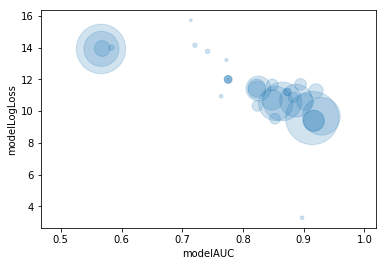

In [14]:
labels=['model','modelLogLoss','modelAUC','runtimes']
fields=list(zip(model,modelLogLoss,modelAUC,runtimes))
output1=pd.DataFrame(fields,columns=labels)
output1.plot.scatter(x='modelAUC',y='modelLogLoss',s=output1['runtimes']*2, alpha=.2)

In [15]:
output1.to_csv("round_1.csv",index=False)

In [24]:
#############################################################################
#
# Train Best Models
#
##########################################

print('--ML Model Output--', '\n')

model=[]
modelLogLoss=[]
modelAUC=[]
runtimes=[]
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    if bin_cnt<=2:
        scorers = {'Log Loss': make_scorer(log_loss), 'roc_auc': 'roc_auc'}
    else:
        scorers = {'Log Loss': make_scorer(log_loss)}

    ###Iterations of Top Models###
   
    rf4 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf41 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=100, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf42 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf43 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.1, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    
    et4 = ExtraTreesClassifier(n_estimators=500, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et41 = ExtraTreesClassifier(n_estimators=500, max_features=0.1, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et42 = ExtraTreesClassifier(n_estimators=500, max_features=0.2, max_leaf_nodes=500, criterion='gini', random_state=rand_st)
    et43 = ExtraTreesClassifier(n_estimators=500, max_features=0.3, max_leaf_nodes=500, criterion='gini', random_state=rand_st)
    
    adb0 = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb01 = AdaBoostClassifier(base_estimator=None, n_estimators=45, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb02 = AdaBoostClassifier(base_estimator=None, n_estimators=40, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    adb03 = AdaBoostClassifier(base_estimator=None, n_estimators=35, learning_rate=1.0, algorithm='SAMME.R', random_state=rand_st)
    
    bc4 = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc41 = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=0.2, random_state=rand_st)
    bc42 = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=0.1, random_state=rand_st)
    bc43 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    
    gbc2 = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state=rand_st)
    gbc21 = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.1, max_depth=2, min_samples_split=3, random_state=rand_st)
    gbc22 = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.1, max_depth=3, min_samples_split=2, random_state=rand_st)
    gbc23 = GradientBoostingClassifier(n_estimators=100, loss='exponential', learning_rate=0.1, max_depth=4, min_samples_split=3, random_state=rand_st)


    
    models={'rf4':rf4,
            'rf41':rf41,
            'rf42':rf42,
            'rf43':rf43,
            
            'adb0':adb0,
            'adb01':adb01,
            'adb02':adb02,
            'adb03':adb03,
            
            'et4':et4,
            'et41':et41,
            'et42':et42,
            'et43':et43,
           
            'bc4':bc4,
            'bc41':bc41,
            'bc42':bc42,
            'bc43':bc43,
           
            'gbc2':gbc2,
            'gbc21':gbc21,
            'gbc22':gbc22,
            'gbc23':gbc23
           }
    
    ####Train Models###
    
    for key, value in models.items():
        start_ts=time.time()   
        scores = cross_validate(value, data_np, target_np, scoring=scorers, cv=5)
        scores_Acc = scores['test_Log Loss']
        print(key+" LogLoss: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))        
        if bin_cnt<=2:                                                                                                  #Only works with binary classes, not multiclass
            scores_AUC= scores['test_roc_auc']
            print(key+" AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
        print("CV Runtime:", time.time()-start_ts,"\n")
        model.append(key)
        modelLogLoss.append(scores_Acc.mean())
        modelAUC.append(scores_AUC.mean())
        runtimes.append(time.time()-start_ts)

--ML Model Output-- 

rf4 LogLoss: 9.35 (+/- 10.09)
rf4 AUC: 0.92 (+/- 0.14)
CV Runtime: 219.90306973457336 

rf41 LogLoss: 9.38 (+/- 9.74)
rf41 AUC: 0.91 (+/- 0.13)
CV Runtime: 199.85977721214294 

rf42 LogLoss: 9.57 (+/- 9.15)
rf42 AUC: 0.91 (+/- 0.11)
CV Runtime: 177.79187774658203 

rf43 LogLoss: 9.35 (+/- 10.09)
rf43 AUC: 0.92 (+/- 0.14)
CV Runtime: 220.64532470703125 

adb0 LogLoss: 10.94 (+/- 9.96)
adb0 AUC: 0.90 (+/- 0.12)
CV Runtime: 66.48306059837341 

adb01 LogLoss: 11.29 (+/- 9.40)
adb01 AUC: 0.90 (+/- 0.13)
CV Runtime: 61.61174488067627 

adb02 LogLoss: 11.03 (+/- 9.04)
adb02 AUC: 0.89 (+/- 0.14)
CV Runtime: 55.80724334716797 

adb03 LogLoss: 11.54 (+/- 8.74)
adb03 AUC: 0.89 (+/- 0.14)
CV Runtime: 49.6728196144104 

et4 LogLoss: 11.35 (+/- 8.48)
et4 AUC: 0.92 (+/- 0.08)
CV Runtime: 101.51779651641846 

et41 LogLoss: 11.35 (+/- 8.48)
et41 AUC: 0.92 (+/- 0.08)
CV Runtime: 101.43253946304321 

et42 LogLoss: 10.86 (+/- 8.35)
et42 AUC: 0.92 (+/- 0.11)
CV Runtime: 117.7193911075

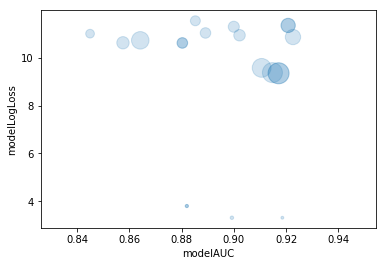

In [25]:
labels=['model','modelLogLoss','modelAUC','runtimes']
fields=list(zip(model,modelLogLoss,modelAUC,runtimes))
output2=pd.DataFrame(fields,columns=labels)
output2.plot.scatter(x='modelAUC',y='modelLogLoss',s=output2['runtimes']*2, alpha=.2)

In [26]:
output2.to_csv("round_2.csv",index=False)

In [24]:
#############################################################################
#
# Train Best Models (again)
#
##########################################

print('--ML Model Output--', '\n')

model=[]
modelLogLoss=[]
modelAUC=[]
runtimes=[]
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    if bin_cnt<=2:
        scorers = {'Log Loss': make_scorer(log_loss), 'roc_auc': 'roc_auc'}
    else:
        scorers = {'Log Loss': make_scorer(log_loss)}

    ###Iterations of Top Models###
   
    bc43 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc431 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc432 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc433 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    
    et40 = ExtraTreesClassifier(n_estimators=500, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et401 = ExtraTreesClassifier(n_estimators=400, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et402 = ExtraTreesClassifier(n_estimators=300, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et403 = ExtraTreesClassifier(n_estimators=200, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    
    rf40 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf401 = RandomForestClassifier(n_estimators=400, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf402 = RandomForestClassifier(n_estimators=300, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf403 = RandomForestClassifier(n_estimators=200, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    
    
    models={'bc43':bc43,
            'bc431':bc431,
            'bc432':bc432,
            'bc433':bc433,
            
            'et40':et40,
            'et401':et401,
            'et402':et402,
            'et403':et403,
            
            'rf40':rf40,
            'rf401':rf401,
            'rf402':rf402,
            'rf403':rf403}
    
    ####Train Models###
    
    for key, value in models.items():
        start_ts=time.time()   
        scores = cross_validate(value, data_np, target_np, scoring=scorers, cv=5)
        scores_Acc = scores['test_Log Loss']
        print(key+" LogLoss: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))        
        if bin_cnt<=2:                                                                                                  #Only works with binary classes, not multiclass
            scores_AUC= scores['test_roc_auc']
            print(key+" AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
        print("CV Runtime:", time.time()-start_ts,"\n")
        model.append(key)
        modelLogLoss.append(scores_Acc.mean())
        modelAUC.append(scores_AUC.mean())
        runtimes.append(time.time()-start_ts)

--ML Model Output-- 

bc43 LogLoss: 3.37 (+/- 8.32)
bc43 AUC: 0.93 (+/- 0.18)
CV Runtime: 4.393092632293701 

bc431 LogLoss: 3.37 (+/- 8.32)
bc431 AUC: 0.93 (+/- 0.18)
CV Runtime: 4.388348817825317 

bc432 LogLoss: 3.37 (+/- 8.32)
bc432 AUC: 0.93 (+/- 0.18)
CV Runtime: 5.10692572593689 

bc433 LogLoss: 3.37 (+/- 8.32)
bc433 AUC: 0.93 (+/- 0.18)
CV Runtime: 4.785470008850098 

et40 LogLoss: 11.30 (+/- 8.55)
et40 AUC: 0.92 (+/- 0.08)
CV Runtime: 101.71278166770935 

et401 LogLoss: 11.30 (+/- 8.57)
et401 AUC: 0.92 (+/- 0.07)
CV Runtime: 82.36741065979004 

et402 LogLoss: 11.23 (+/- 8.54)
et402 AUC: 0.92 (+/- 0.07)
CV Runtime: 61.144623041152954 

et403 LogLoss: 10.98 (+/- 8.59)
et403 AUC: 0.92 (+/- 0.08)
CV Runtime: 41.67262315750122 

rf40 LogLoss: 9.42 (+/- 10.16)
rf40 AUC: 0.91 (+/- 0.16)
CV Runtime: 220.73045825958252 

rf401 LogLoss: 9.38 (+/- 10.17)
rf401 AUC: 0.91 (+/- 0.16)
CV Runtime: 175.3676176071167 

rf402 LogLoss: 9.30 (+/- 10.10)
rf402 AUC: 0.92 (+/- 0.15)
CV Runtime: 132.2

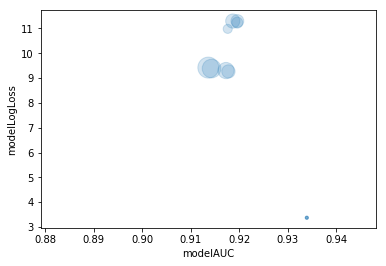

In [25]:
labels=['model','modelLogLoss','modelAUC','runtimes']
fields=list(zip(model,modelLogLoss,modelAUC,runtimes))
output3=pd.DataFrame(fields,columns=labels)
output3.plot.scatter(x='modelAUC',y='modelLogLoss',s=output3['runtimes']*2, alpha=.2)

In [26]:
output3.to_csv("round_3.csv",index=False)

In [27]:
#############################################################################
#
# Look at Accuracy
#
##########################################

print('--ML Model Output--', '\n')

model=[]
modelAccuracy=[]
modelAUC=[]
runtimes=[]
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    if bin_cnt<=2:
        scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
    else:
        scorers = {'Accuracy': 'accuracy'}

    ###Iterations of Top Models###
   
    bc43 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc431 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc432 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    bc433 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    
    et40 = ExtraTreesClassifier(n_estimators=500, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et401 = ExtraTreesClassifier(n_estimators=400, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et402 = ExtraTreesClassifier(n_estimators=300, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    et403 = ExtraTreesClassifier(n_estimators=200, max_features=0.2, max_leaf_nodes=200, criterion='gini', random_state=rand_st)
    
    rf40 = RandomForestClassifier(n_estimators=500, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf401 = RandomForestClassifier(n_estimators=400, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf402 = RandomForestClassifier(n_estimators=300, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    rf403 = RandomForestClassifier(n_estimators=200, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    
    
    models={'bc43':bc43,
            'bc431':bc431,
            'bc432':bc432,
            'bc433':bc433,
            
            'et40':et40,
            'et401':et401,
            'et402':et402,
            'et403':et403,
            
            'rf40':rf40,
            'rf401':rf401,
            'rf402':rf402,
            'rf403':rf403}
    
    ####Train Models###
    
    for key, value in models.items():
        start_ts=time.time()   
        scores = cross_validate(value, data_np, target_np, scoring=scorers, cv=5)
        scores_Acc = scores['test_Accuracy']
        print(key+" Accuracy: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))        
        if bin_cnt<=2:                                                                                                  #Only works with binary classes, not multiclass
            scores_AUC= scores['test_roc_auc']
            print(key+" AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
        print("CV Runtime:", time.time()-start_ts,"\n")
        model.append(key)
        modelAccuracy.append(scores_Acc.mean())
        modelAUC.append(scores_AUC.mean())
        runtimes.append(time.time()-start_ts)

--ML Model Output-- 

bc43 Accuracy: 0.90 (+/- 0.24)
bc43 AUC: 0.93 (+/- 0.18)
CV Runtime: 3.942244291305542 

bc431 Accuracy: 0.90 (+/- 0.24)
bc431 AUC: 0.93 (+/- 0.18)
CV Runtime: 3.9662933349609375 

bc432 Accuracy: 0.90 (+/- 0.24)
bc432 AUC: 0.93 (+/- 0.18)
CV Runtime: 4.1344990730285645 

bc433 Accuracy: 0.90 (+/- 0.24)
bc433 AUC: 0.93 (+/- 0.18)
CV Runtime: 4.092106342315674 

et40 Accuracy: 0.67 (+/- 0.25)
et40 AUC: 0.92 (+/- 0.08)
CV Runtime: 100.37532329559326 

et401 Accuracy: 0.67 (+/- 0.25)
et401 AUC: 0.92 (+/- 0.07)
CV Runtime: 80.03304076194763 

et402 Accuracy: 0.67 (+/- 0.25)
et402 AUC: 0.92 (+/- 0.07)
CV Runtime: 60.334100008010864 

et403 Accuracy: 0.68 (+/- 0.25)
et403 AUC: 0.92 (+/- 0.08)
CV Runtime: 40.52350831031799 

rf40 Accuracy: 0.73 (+/- 0.29)
rf40 AUC: 0.91 (+/- 0.16)
CV Runtime: 218.61273980140686 

rf401 Accuracy: 0.73 (+/- 0.29)
rf401 AUC: 0.91 (+/- 0.16)
CV Runtime: 174.48702311515808 

rf402 Accuracy: 0.73 (+/- 0.29)
rf402 AUC: 0.92 (+/- 0.15)
CV Runtim

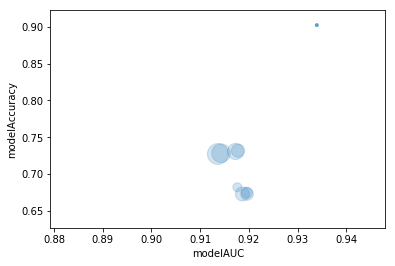

In [28]:
labels=['model','modelAccuracy','modelAUC','runtimes']
fields=list(zip(model,modelAccuracy,modelAUC,runtimes))
output4=pd.DataFrame(fields,columns=labels)
output4.plot.scatter(x='modelAUC',y='modelAccuracy',s=output4['runtimes']*2, alpha=.2)

In [29]:
output4.to_csv("round_4.csv",index=False)

In [22]:
#############################################################################
#
# Voting Classifier
#
##########################################

print('--ML Model Output--', '\n')

model=[]
modelAccuracy=[]
modelAccuracySD=[]
modelAUC=[]
modelAUCSD=[]
runtimes=[]
####Cross-Val Classifiers####
if binning==1 and cross_val==1:
    #Setup Crossval classifier scorers
    if bin_cnt<=2:
        scorers = {'Accuracy': 'accuracy', 'roc_auc': 'roc_auc'}
    else:
        scorers = {'Accuracy': 'accuracy'}

    ###Iterations of Top Models###
   
    bc43 = BaggingClassifier(base_estimator=None, n_estimators=5, max_samples=1.0, max_features=0.3, random_state=rand_st)
    
    rf403 = RandomForestClassifier(n_estimators=200, max_depth=None, max_features=0.2, max_leaf_nodes=200, min_samples_leaf=2, min_samples_split=5, criterion='entropy', random_state=rand_st)
    
    eclf1 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[1,1])
    
    eclf2 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[2,1])
    
    eclf3 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[3,1])
    
    eclf4 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[4,1])
    
    eclf5 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[5,1])
    
    eclf6 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[6,1])
    
    eclf7 = VotingClassifier(estimators=[('bc43', bc43), ('rf403', rf403)], voting='soft', weights=[7,1])
    
    models={'bc43': bc43,
            'rf403':rf403,
            'eclf1':eclf1,
            'eclf2':eclf2,
            'eclf3':eclf3,
            'eclf4':eclf4,
            'eclf5':eclf5,
            'eclf6':eclf6,
            'eclf7':eclf7 }
    
    ####Train Models###
    
    for key, value in models.items():
        start_ts=time.time()   
        scores = cross_validate(value, data_np, target_np, scoring=scorers, cv=5)
        scores_Acc = scores['test_Accuracy']
        print(key+" Accuracy: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))        
        if bin_cnt<=2:                                                                                                  #Only works with binary classes, not multiclass
            scores_AUC= scores['test_roc_auc']
            print(key+" AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))                           
        print("CV Runtime:", time.time()-start_ts,"\n")
        model.append(key)
        modelAccuracy.append(scores_Acc.mean())
        modelAccuracySD.append(scores_Acc.std())
        modelAUC.append(scores_AUC.mean())
        modelAUCSD.append(scores_AUC.std())
        runtimes.append(time.time()-start_ts)





--ML Model Output-- 

bc43 Accuracy: 0.90 (+/- 0.24)
bc43 AUC: 0.92 (+/- 0.22)
CV Runtime: 4.004154920578003 

rf403 Accuracy: 0.73 (+/- 0.29)
rf403 AUC: 0.92 (+/- 0.14)
CV Runtime: 87.8574767112732 

eclf1 Accuracy: 0.78 (+/- 0.33)
eclf1 AUC: 0.95 (+/- 0.11)
CV Runtime: 92.3723030090332 

eclf2 Accuracy: 0.81 (+/- 0.30)
eclf2 AUC: 0.95 (+/- 0.14)
CV Runtime: 92.0378634929657 

eclf3 Accuracy: 0.84 (+/- 0.26)
eclf3 AUC: 0.94 (+/- 0.16)
CV Runtime: 91.71748399734497 

eclf4 Accuracy: 0.86 (+/- 0.23)
eclf4 AUC: 0.94 (+/- 0.17)
CV Runtime: 92.0686948299408 

eclf5 Accuracy: 0.88 (+/- 0.23)
eclf5 AUC: 0.94 (+/- 0.18)
CV Runtime: 91.99433779716492 

eclf6 Accuracy: 0.89 (+/- 0.23)
eclf6 AUC: 0.94 (+/- 0.18)
CV Runtime: 92.70086479187012 

eclf7 Accuracy: 0.89 (+/- 0.23)
eclf7 AUC: 0.94 (+/- 0.19)
CV Runtime: 92.6428427696228 



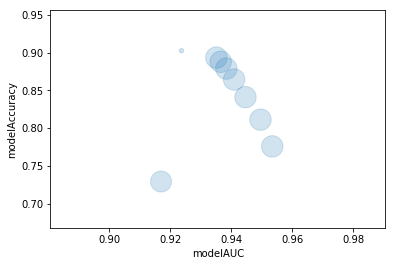

In [23]:
labels=['model','modelAccuracy', 'modelAccuracy SD', 'modelAUC', 'modelAUCSD', 'runtimes']
fields=list(zip(model,modelAccuracy,modelAccuracySD,modelAUC,modelAUCSD,runtimes))
output5=pd.DataFrame(fields,columns=labels)
output5.plot.scatter(x='modelAUC',y='modelAccuracy',s=output5['runtimes']*5, alpha=.2)

In [24]:
output5.to_csv("round_5.csv",index=False)